In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,StratifiedKFold
import tensorflow as tf
from tensorflow import keras
import sklearn
from keras.callbacks import EarlyStopping

In [2]:
data = []
with open('./diabetes.txt', 'r') as f:
    stripped = [line.strip() for line in f]
    for row in stripped:
        data_dict = {}
        splited = row.split()
        data_dict['Outcome'] = int(splited[0])

        column_mapping = {1: "Pregnancies", 2: "Glucose", 3: "BloodPressure",
                          4: "SkinThickness", 5: "Insulin", 6: "BMI",
                          7: "DiabetesPedigreeFunction", 8: "Age"}
        for index, column_val in enumerate(splited):
            if index == 0:
                continue
            else:
                key, value = column_val.split(":")
                data_dict[column_mapping[int(key)]] = float(value)
        data.append(data_dict)

df = pd.DataFrame.from_records(data)

In [3]:
df

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


array([[<Axes: title={'center': 'Outcome'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

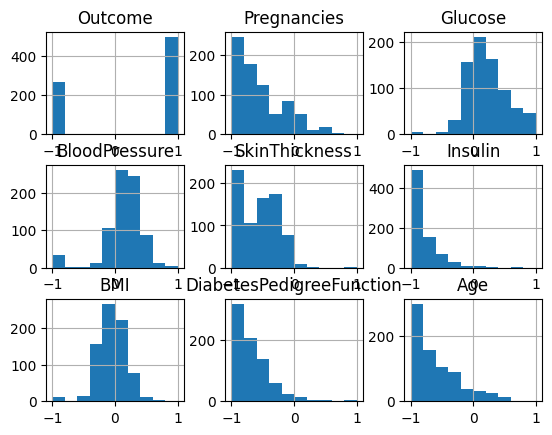

In [6]:
df.hist()


In [7]:
def plot_histograms(df, feature_group, class_labels):
    Nrows = 2
    Ncols = 5

    features = feature_group

    fig, axes = plt.subplots(Nrows, Ncols, figsize=(15, 6))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate over the features and plot histograms
    for i, feature in enumerate(features):
        ax = axes[i]

        for class_label in class_labels:
            data = df[df['Outcome'] == class_label][feature]
            sns.histplot(data=data, bins=30, kde=True, ax=ax, label=class_label)

        ax.set_title(feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.legend()

    # Remove any unused subplots
    for i in range(len(features), Nrows * Ncols):
        fig.delaxes(axes[i])

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

In [8]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
            'Age']

class_label = [-1, 1]

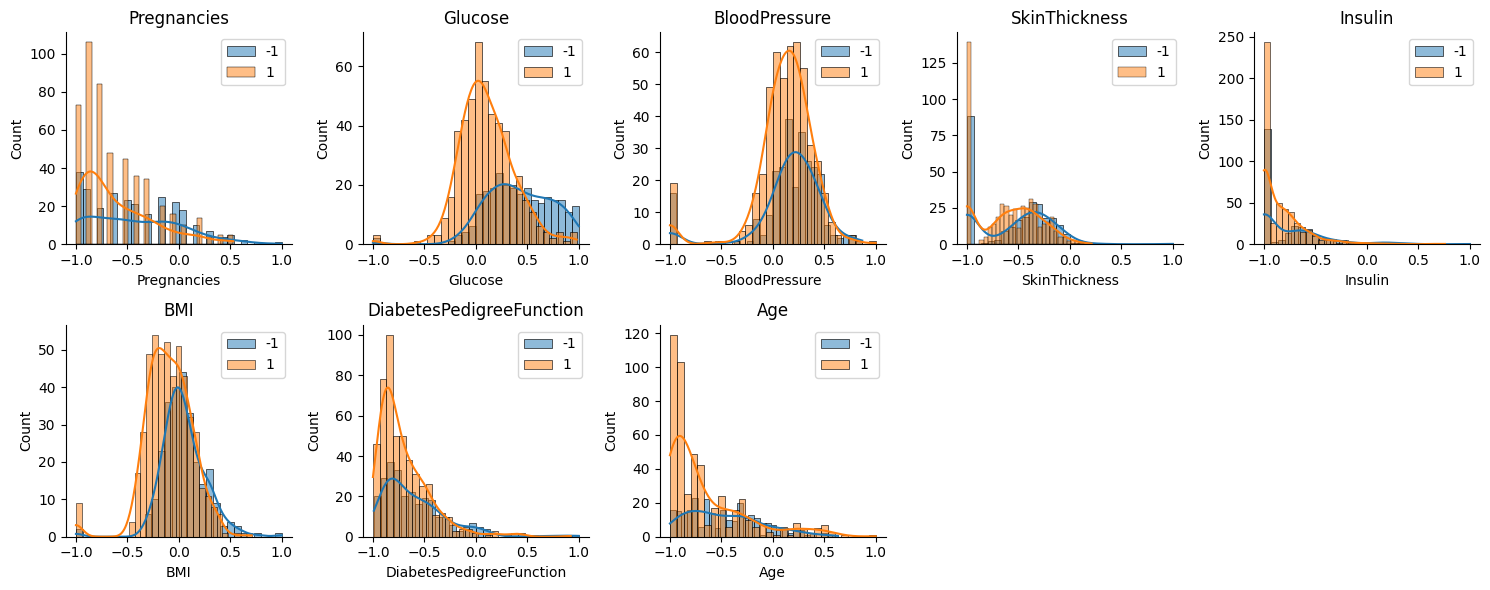

In [9]:
plot_histograms(df, features, class_label)

# Data preprocessing #

In [9]:
#explore missing value
df.isnull().any()

Outcome                     False
Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                          True
dtype: bool

In [10]:
# check any 0 values
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Outcome: 0
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


In [11]:
# replace NaN with its mean
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df.isnull().any()

Outcome                     False
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

In [13]:
df.describe()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.302083,-0.547641,0.215020,0.133050,-0.585122,-0.811349,-0.046421,-0.663641,-0.598202
std,0.953903,0.396421,0.321333,0.317272,0.322267,0.272444,0.234997,0.282945,0.387268
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.040984,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000
50%,1.000000,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333
75%,1.000000,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting data into training, testing, and validation sets #

In [15]:
y = df['Outcome']

In [16]:
X = df.drop(['Outcome'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Single layer perceptron

In [20]:
import numpy as np

def train_model(X, y, lr, epochs):
    np.random.seed(0)
    weight = np.random.randn(len(X.columns))
    for _ in range(epochs):
        update_sum = np.zeros(len(X.columns))
        for index in range(len(X)):
            X_i = X.iloc[index].to_numpy()
            y_i = y.iloc[index]
            update_sum = update_sum + y_i * X_i * ((np.dot(weight, X_i) * y_i) < 0)
        weight = weight + lr * update_sum
    return weight

In [22]:
def predict_model(X, y, weight):
    prediction_list = []
    for index in range(len(X)):
        X_i = X.iloc[index].to_numpy()
        prediction_list.append(int(np.sign(np.dot(X_i, weight))))
    accuracy = (sum(np.equal(prediction_list, y)) / len(y))
    return accuracy

In [37]:
best_accuracy = -1
best_lr = None
best_epoch = None

lr_list = [0.1, 0.01, 0.001, 0.0001]
epoch_list = [10, 100, 1000, 2000, 3000, 4000, 5000]

for lr in lr_list:
    for epoch in epoch_list:
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        accuracy_list = []
        
        for i, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
            X_train_k_fold = X_train.iloc[train_index]
            y_train_k_fold = y_train.iloc[train_index]
            X_valid_k_fold = X_train.iloc[valid_index]
            y_valid_k_fold = y_train.iloc[valid_index]

            weight = train_model(X_train_k_fold, y_train_k_fold, lr, epoch)
            accuracy = predict_model(X_valid_k_fold, y_valid_k_fold, weight)
            
        accuracy_list.append(accuracy)
        
        average_acc = sum(accuracy_list) / len(accuracy_list)
        
        print(f"Accuracy for lr={lr}, epoch={epoch} is {average_acc}")
        
        if average_acc > best_accuracy:
            best_accuracy = average_acc
            best_lr = lr
            best_epoch = epoch

print()
print('*' * 73)
print(f"Best accuracy is {best_accuracy} with learning rate={best_lr} and epoch={best_epoch}")
print('*' * 73)
print()

Accuracy for lr=0.1, epoch=10 is 0.6594202898550725
Accuracy for lr=0.1, epoch=100 is 0.6956521739130435
Accuracy for lr=0.1, epoch=1000 is 0.6521739130434783
Accuracy for lr=0.1, epoch=2000 is 0.7463768115942029
Accuracy for lr=0.1, epoch=3000 is 0.6014492753623188
Accuracy for lr=0.1, epoch=4000 is 0.7391304347826086
Accuracy for lr=0.1, epoch=5000 is 0.717391304347826
Accuracy for lr=0.01, epoch=10 is 0.7463768115942029
Accuracy for lr=0.01, epoch=100 is 0.6956521739130435
Accuracy for lr=0.01, epoch=1000 is 0.6956521739130435
Accuracy for lr=0.01, epoch=2000 is 0.7318840579710145
Accuracy for lr=0.01, epoch=3000 is 0.7028985507246377
Accuracy for lr=0.01, epoch=4000 is 0.8115942028985508
Accuracy for lr=0.01, epoch=5000 is 0.7246376811594203
Accuracy for lr=0.001, epoch=10 is 0.6376811594202898
Accuracy for lr=0.001, epoch=100 is 0.6521739130434783
Accuracy for lr=0.001, epoch=1000 is 0.717391304347826
Accuracy for lr=0.001, epoch=2000 is 0.6231884057971014
Accuracy for lr=0.001, e

# Multilayer perceptron #

In [18]:
y_train = y_train.map({1: 1, -1: 0})
y_test = y_test.map({1: 1, -1: 0})

In [19]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Baseline model ##

In [21]:
from keras.models import Sequential
dense_model = keras.models.Sequential()
dense_model.add(keras.layers.Dense(32, input_dim=8, activation='relu'))
dense_model.add(keras.layers.Dense(16, activation='relu'))
dense_model.add(keras.layers.Dense(1, activation='sigmoid'))

In [22]:
dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
dense_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [25]:
dense_model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), callbacks=[callback])

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7297 - accuracy: 0.3351 - val_loss: 0.6942 - val_accuracy: 0.4820
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.6377 - val_loss: 0.6601 - val_accuracy: 0.6475
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6612 - val_loss: 0.6383 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.6576 - val_loss: 0.6165 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6001 - accuracy: 0.6576 - val_loss: 0.5970 - val_accuracy: 0.6187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.6594 - val_loss: 0.5742 - val_accuracy: 0.6403
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.6703 - val_loss: 0.5493 - val_accuracy: 0.6978
Epoch 8/100
1

In [26]:
y_test_prob = dense_model.predict(X_test)
y_test_prediction = np.where(y_test_prob < 0.5, 0, 1).flatten()

3/3 [==============================] - 0s 639us/step


In [27]:
accuracy = (sum(np.equal(y_test_prediction, y_test)) / len(y_test))
print(f"Baseline accuracy: {accuracy * 100} %")

Baseline accuracy: 76.62337662337663 %


# Hyperparameters Tuning #

## Layer ##

In [29]:
best_result, best_score = None, 0
for i in [1, 3, 5, 7, 9]:
    print(f'{"#" * 30} {i} Layers {"#" * 30}')
    dense_model = keras.models.Sequential()
    dense_model.add(keras.layers.Dense(32, input_dim=8, activation='relu'))
    for _ in range(i):
        dense_model.add(keras.layers.Dense(32, activation='relu'))
    dense_model.add(keras.layers.Dense(16, activation='relu'))
    dense_model.add(keras.layers.Dense(1, activation='sigmoid'))

    dense_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    dense_model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), callbacks=[callback])

    y_test_prob = dense_model.predict(X_validation)
    y_test_prediction = np.where(y_test_prob < 0.5, 0, 1).flatten()

    accuracy = (sum(np.equal(y_test_prediction, y_validation)) / len(y_validation))
    if accuracy > best_score:
        best_result = i
        best_score = accuracy

print()
print('*' * 73)
print(f"Best layer is {best_result} with its score {best_score}")
print('*' * 73)
print()

############################## 1 Layers ##############################
Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.6775 - val_loss: 0.6476 - val_accuracy: 0.6547
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.6721 - val_loss: 0.6169 - val_accuracy: 0.6547
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.6703 - val_loss: 0.5825 - val_accuracy: 0.6835
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5657 - accuracy: 0.7011 - val_loss: 0.5521 - val_accuracy: 0.7266
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7210 - val_loss: 0.5182 - val_accuracy: 0.7770
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7446 - val_loss: 0.4886 - val_accuracy: 0.7914
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5017 - a

## Optimizer

In [30]:
from keras.optimizers import Adam, SGD, RMSprop, Adamax

best_result, best_score = None, 0
for optimizer in [Adam(), SGD(), RMSprop(), Adamax()]:
    print(f'{"#" * 30} Optimizer: {optimizer} {"#" * 30}')
    dense_model = keras.models.Sequential()
    dense_model.add(keras.layers.Dense(32, input_dim=8, activation='relu'))
    for _ in range(5):
        dense_model.add(keras.layers.Dense(32, activation='relu'))
    dense_model.add(keras.layers.Dense(16, activation='relu'))
    dense_model.add(keras.layers.Dense(1, activation='sigmoid'))

    dense_model.compile(loss='binary_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    dense_model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), callbacks=[callback])

    y_test_prob = dense_model.predict(X_validation)
    y_test_prediction = np.where(y_test_prob < 0.5, 0, 1).flatten()

    accuracy = (sum(np.equal(y_test_prediction, y_validation)) / len(y_validation))
    if accuracy > best_score:
        best_result = optimizer
        best_score = accuracy

print()
print('*' * 73)
print(f"Best optimizer is {best_result} with its score {best_score}")
print('*' * 73)
print()

############################## Optimizer: <keras.src.optimizers.adam.Adam object at 0x29b1d6690> ##############################
Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5616 - val_loss: 0.6798 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6594 - val_loss: 0.6474 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6177 - accuracy: 0.6594 - val_loss: 0.6143 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.6594 - val_loss: 0.5664 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.6920 - val_loss: 0.4995 - val_accuracy: 0.7842
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7591 - val_loss: 0.4623 - val_accuracy: 0.7698
Epoch 7/100
18/18 [=======

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5054 - val_loss: 0.6859 - val_accuracy: 0.6403
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.6649 - val_loss: 0.6805 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6594 - val_loss: 0.6763 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6594 - val_loss: 0.6729 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.6594 - val_loss: 0.6698 - val_accuracy: 0.6187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6594 - val_loss: 0.6673 - val_accuracy: 0.6187
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6594 - val_loss: 0.6654 - val_accuracy: 0.6187
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6268 - val_loss: 0.6407 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6594 - val_loss: 0.5846 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.6884 - val_loss: 0.5394 - val_accuracy: 0.7266
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7428 - val_loss: 0.5139 - val_accuracy: 0.7626
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.7591 - val_loss: 0.4830 - val_accuracy: 0.7554
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7609 - val_loss: 0.4739 - val_accuracy: 0.7698
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7663 - val_loss: 0.4741 - val_accuracy: 0.7842
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.6558 - val_loss: 0.6503 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6594 - val_loss: 0.6313 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6594 - val_loss: 0.6171 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.6594 - val_loss: 0.6011 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.6594 - val_loss: 0.5827 - val_accuracy: 0.6187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.6612 - val_loss: 0.5624 - val_accuracy: 0.6259
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.6793 - val_loss: 0.5401 - val_accuracy: 0.7338
Epoch 8/100
1

## Learning Rate

In [31]:
best_result, best_score = None, 0
for lr in [0.01, 0.005, 0.001, 0.0005, 0.0001]:
    print(f'{"#" * 30} Learning Rate: {lr} {"#" * 30}')
    dense_model = keras.models.Sequential()
    dense_model.add(keras.layers.Dense(32, input_dim=8, activation='relu'))
    for _ in range(5):
        dense_model.add(keras.layers.Dense(32, activation='relu'))
    dense_model.add(keras.layers.Dense(16, activation='relu'))
    dense_model.add(keras.layers.Dense(1, activation='sigmoid'))

    dense_model.compile(loss='binary_crossentropy',
                    optimizer=Adamax(learning_rate=lr),
                    metrics=['accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    dense_model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), callbacks=[callback])

    y_test_prob = dense_model.predict(X_validation)
    y_test_prediction = np.where(y_test_prob < 0.5, 0, 1).flatten()

    accuracy = (sum(np.equal(y_test_prediction, y_validation)) / len(y_validation))
    if accuracy > best_score:
        best_result = lr
        best_score = accuracy

print()
print('*' * 73)
print(f"Best learning rate is {best_result} with its score {best_score}")
print('*' * 73)
print()


############################## Learning Rate: 0.01 ##############################
Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.6449 - val_loss: 0.6281 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.6594 - val_loss: 0.5339 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.6594 - val_loss: 0.4941 - val_accuracy: 0.6547
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7591 - val_loss: 0.4630 - val_accuracy: 0.8417
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7591 - val_loss: 0.4407 - val_accuracy: 0.8201
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7862 - val_loss: 0.4578 - val_accuracy: 0.7698
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss:

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6635 - accuracy: 0.6486 - val_loss: 0.6178 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.6884 - val_loss: 0.5081 - val_accuracy: 0.7698
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7500 - val_loss: 0.4468 - val_accuracy: 0.7914
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7699 - val_loss: 0.4391 - val_accuracy: 0.7626
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7717 - val_loss: 0.4313 - val_accuracy: 0.7842
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7862 - val_loss: 0.4393 - val_accuracy: 0.7914
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7935 - val_loss: 0.4311 - val_accuracy: 0.7842
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.6196 - val_loss: 0.6678 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6594 - val_loss: 0.6465 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.6594 - val_loss: 0.6238 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.6594 - val_loss: 0.6047 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.6594 - val_loss: 0.5882 - val_accuracy: 0.6187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.6594 - val_loss: 0.5680 - val_accuracy: 0.6187
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5593 - accuracy: 0.6703 - val_loss: 0.5480 - val_accuracy: 0.6763
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6736 - accuracy: 0.6612 - val_loss: 0.6622 - val_accuracy: 0.6259
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6594 - val_loss: 0.6405 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6594 - val_loss: 0.6248 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6594 - val_loss: 0.6126 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6594 - val_loss: 0.6009 - val_accuracy: 0.6187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.6594 - val_loss: 0.5885 - val_accuracy: 0.6187
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.6594 - val_loss: 0.5774 - val_accuracy: 0.6187
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.6540 - val_loss: 0.6816 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.6576 - val_loss: 0.6746 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6594 - val_loss: 0.6692 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6594 - val_loss: 0.6644 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6594 - val_loss: 0.6601 - val_accuracy: 0.6187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.6594 - val_loss: 0.6562 - val_accuracy: 0.6187
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6594 - val_loss: 0.6526 - val_accuracy: 0.6187
Epoch 8/100
1

## Activation Function

In [33]:
from keras.optimizers import Adam
best_result, best_score = None, 0
for activation in ['sigmoid', 'tanh', 'relu']:
    print(f'{"#" * 30} Activation Function: {activation} {"#" * 30}')
    dense_model = keras.models.Sequential()
    dense_model.add(keras.layers.Dense(32, input_dim=8, activation=activation))
    for _ in range(5):
        dense_model.add(keras.layers.Dense(32, activation=activation))
    dense_model.add(keras.layers.Dense(16, activation=activation))
    dense_model.add(keras.layers.Dense(1, activation='sigmoid'))

    dense_model.compile(loss='binary_crossentropy',
                    optimizer=Adamax(learning_rate=0.0005),
                    metrics=['accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    dense_model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), callbacks=[callback])

    y_test_prob = dense_model.predict(X_validation)
    y_test_prediction = np.where(y_test_prob < 0.5, 0, 1).flatten()

    accuracy = (sum(np.equal(y_test_prediction, y_validation)) / len(y_validation))
    if accuracy > best_score:
        best_result = activation
        best_score = accuracy

print()
print('*' * 73)
print(f"Best activation function is {best_result} with its score {best_score}")
print('*' * 73)
print()


############################## Activation Function: sigmoid ##############################
Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 1.2584 - accuracy: 0.3406 - val_loss: 1.1237 - val_accuracy: 0.3813
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1318 - accuracy: 0.3406 - val_loss: 1.0229 - val_accuracy: 0.3813
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0317 - accuracy: 0.3406 - val_loss: 0.9427 - val_accuracy: 0.3813
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.9522 - accuracy: 0.3406 - val_loss: 0.8800 - val_accuracy: 0.3813
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.8861 - accuracy: 0.3406 - val_loss: 0.8294 - val_accuracy: 0.3813
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.8347 - accuracy: 0.3406 - val_loss: 0.7875 - val_accuracy: 0.3813
Epoch 7/100
18/18 [==============================] - 0s 1ms/ste

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 0.5761 - val_loss: 0.6511 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.6594 - val_loss: 0.6363 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.6576 - val_loss: 0.6187 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.6594 - val_loss: 0.5922 - val_accuracy: 0.6475
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.6812 - val_loss: 0.5613 - val_accuracy: 0.7266
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5593 - accuracy: 0.6975 - val_loss: 0.5293 - val_accuracy: 0.7626
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7373 - val_loss: 0.4996 - val_accuracy: 0.7914
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.6304 - val_loss: 0.6765 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6594 - val_loss: 0.6639 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6594 - val_loss: 0.6522 - val_accuracy: 0.6187
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.6594 - val_loss: 0.6423 - val_accuracy: 0.6187
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.6594 - val_loss: 0.6319 - val_accuracy: 0.6187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.6594 - val_loss: 0.6233 - val_accuracy: 0.6187
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.6594 - val_loss: 0.6160 - val_accuracy: 0.6187
Epoch 8/100
1

## Patience ##

In [34]:
best_result, best_score = None, 0

for patience in range(1, 20):
    print(f'{"#" * 30} patience: {patience} {"#" * 30}')
    
    dense_model = keras.models.Sequential()
    dense_model.add(keras.layers.Dense(32, input_dim=8, activation='tanh'))
    for _ in range(5):
        dense_model.add(keras.layers.Dense(32, activation='tanh'))
    dense_model.add(keras.layers.Dense(16, activation='tanh'))
    dense_model.add(keras.layers.Dense(1, activation='sigmoid'))

    dense_model.compile(loss='binary_crossentropy',
                        optimizer=Adamax(learning_rate=0.0005),
                        metrics=['accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)

    dense_model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), callbacks=[callback])

    y_test_prob = dense_model.predict(X_validation)
    y_test_prediction = np.where(y_test_prob < 0.5, 0, 1).flatten()

    accuracy = (sum(np.equal(y_test_prediction, y_validation)) / len(y_validation))
    if accuracy > best_score:
        best_result = patience
        best_score = accuracy

print()
print('*' * 73)
print(f"Best patience is {best_result} with its score {best_score}")
print('*' * 73)
print()

############################## patience: 1 ##############################
Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.6793 - val_loss: 0.5641 - val_accuracy: 0.6906
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.7029 - val_loss: 0.5328 - val_accuracy: 0.7194
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7500 - val_loss: 0.5081 - val_accuracy: 0.7410
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.7572 - val_loss: 0.4900 - val_accuracy: 0.7338
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.7627 - val_loss: 0.4798 - val_accuracy: 0.7554
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7627 - val_loss: 0.4673 - val_accuracy: 0.7626
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4988 

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7058 - accuracy: 0.5036 - val_loss: 0.6614 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6594 - val_loss: 0.6436 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.6594 - val_loss: 0.6137 - val_accuracy: 0.6259
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.6775 - val_loss: 0.5827 - val_accuracy: 0.6906
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.6884 - val_loss: 0.5578 - val_accuracy: 0.7050
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7138 - val_loss: 0.5248 - val_accuracy: 0.7410
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.7355 - val_loss: 0.5002 - val_accuracy: 0.7626
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6639 - accuracy: 0.6033 - val_loss: 0.6387 - val_accuracy: 0.6331
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6630 - val_loss: 0.6181 - val_accuracy: 0.6331
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.6775 - val_loss: 0.5860 - val_accuracy: 0.6475
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.6993 - val_loss: 0.5569 - val_accuracy: 0.6763
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7192 - val_loss: 0.5283 - val_accuracy: 0.7482
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7409 - val_loss: 0.5056 - val_accuracy: 0.7770
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7518 - val_loss: 0.4881 - val_accuracy: 0.7914
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6157 - accuracy: 0.6830 - val_loss: 0.6002 - val_accuracy: 0.6403
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6848 - val_loss: 0.5724 - val_accuracy: 0.6763
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7083 - val_loss: 0.5413 - val_accuracy: 0.7482
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7337 - val_loss: 0.5201 - val_accuracy: 0.7770
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7355 - val_loss: 0.5038 - val_accuracy: 0.7770
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7319 - val_loss: 0.4873 - val_accuracy: 0.7770
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7373 - val_loss: 0.4762 - val_accuracy: 0.7986
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6140 - accuracy: 0.6703 - val_loss: 0.6026 - val_accuracy: 0.6475
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.6830 - val_loss: 0.5527 - val_accuracy: 0.7194
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7192 - val_loss: 0.5063 - val_accuracy: 0.7842
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.7482 - val_loss: 0.4752 - val_accuracy: 0.7842
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7482 - val_loss: 0.4538 - val_accuracy: 0.8058
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7554 - val_loss: 0.4400 - val_accuracy: 0.8129
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7645 - val_loss: 0.4338 - val_accuracy: 0.8273
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6264 - accuracy: 0.6775 - val_loss: 0.6063 - val_accuracy: 0.6475
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.6830 - val_loss: 0.5796 - val_accuracy: 0.6619
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.6993 - val_loss: 0.5554 - val_accuracy: 0.6835
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7174 - val_loss: 0.5336 - val_accuracy: 0.7338
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7373 - val_loss: 0.5135 - val_accuracy: 0.7770
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7446 - val_loss: 0.4985 - val_accuracy: 0.7914
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7446 - val_loss: 0.4880 - val_accuracy: 0.7842
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6132 - accuracy: 0.6757 - val_loss: 0.5689 - val_accuracy: 0.6906
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.6884 - val_loss: 0.5315 - val_accuracy: 0.7122
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.7174 - val_loss: 0.5001 - val_accuracy: 0.7554
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7518 - val_loss: 0.4782 - val_accuracy: 0.7626
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.7572 - val_loss: 0.4659 - val_accuracy: 0.7626
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7663 - val_loss: 0.4546 - val_accuracy: 0.7842
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.7663 - val_loss: 0.4468 - val_accuracy: 0.7842
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6408 - accuracy: 0.6250 - val_loss: 0.6158 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.6612 - val_loss: 0.5787 - val_accuracy: 0.6547
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.6975 - val_loss: 0.5384 - val_accuracy: 0.7554
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7373 - val_loss: 0.5057 - val_accuracy: 0.7626
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7518 - val_loss: 0.4795 - val_accuracy: 0.7626
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7717 - val_loss: 0.4614 - val_accuracy: 0.7698
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7699 - val_loss: 0.4503 - val_accuracy: 0.7698
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6371 - accuracy: 0.6685 - val_loss: 0.5934 - val_accuracy: 0.6691
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.6812 - val_loss: 0.5527 - val_accuracy: 0.7338
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.7192 - val_loss: 0.5129 - val_accuracy: 0.7770
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.7428 - val_loss: 0.4852 - val_accuracy: 0.7770
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7572 - val_loss: 0.4666 - val_accuracy: 0.7698
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7645 - val_loss: 0.4544 - val_accuracy: 0.7842
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7681 - val_loss: 0.4469 - val_accuracy: 0.7626
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5891 - accuracy: 0.6793 - val_loss: 0.5681 - val_accuracy: 0.6691
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7083 - val_loss: 0.5246 - val_accuracy: 0.7698
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7409 - val_loss: 0.4962 - val_accuracy: 0.7626
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7518 - val_loss: 0.4776 - val_accuracy: 0.7842
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7536 - val_loss: 0.4603 - val_accuracy: 0.7986
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7609 - val_loss: 0.4549 - val_accuracy: 0.8058
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7663 - val_loss: 0.4454 - val_accuracy: 0.7986
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6067 - accuracy: 0.6685 - val_loss: 0.5860 - val_accuracy: 0.6547
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.6793 - val_loss: 0.5402 - val_accuracy: 0.7554
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7228 - val_loss: 0.5032 - val_accuracy: 0.7554
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7428 - val_loss: 0.4793 - val_accuracy: 0.7554
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7572 - val_loss: 0.4649 - val_accuracy: 0.7770
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7681 - val_loss: 0.4549 - val_accuracy: 0.7698
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7736 - val_loss: 0.4528 - val_accuracy: 0.7770
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.6649 - val_loss: 0.5716 - val_accuracy: 0.6906
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.6848 - val_loss: 0.5402 - val_accuracy: 0.7338
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7156 - val_loss: 0.5072 - val_accuracy: 0.7698
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7301 - val_loss: 0.4812 - val_accuracy: 0.7914
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7482 - val_loss: 0.4662 - val_accuracy: 0.7986
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7591 - val_loss: 0.4525 - val_accuracy: 0.8058
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7609 - val_loss: 0.4418 - val_accuracy: 0.8201
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.6522 - val_loss: 0.5736 - val_accuracy: 0.7194
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.6938 - val_loss: 0.5469 - val_accuracy: 0.7266
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.7029 - val_loss: 0.5283 - val_accuracy: 0.7410
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7011 - val_loss: 0.5088 - val_accuracy: 0.7698
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.7228 - val_loss: 0.4909 - val_accuracy: 0.7842
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.7355 - val_loss: 0.4768 - val_accuracy: 0.7842
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7409 - val_loss: 0.4654 - val_accuracy: 0.7914
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.6576 - val_loss: 0.5870 - val_accuracy: 0.6403
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.7065 - val_loss: 0.5274 - val_accuracy: 0.7194
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7572 - val_loss: 0.4948 - val_accuracy: 0.7482
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7645 - val_loss: 0.4768 - val_accuracy: 0.7554
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.7609 - val_loss: 0.4652 - val_accuracy: 0.7698
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7591 - val_loss: 0.4542 - val_accuracy: 0.7842
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7663 - val_loss: 0.4471 - val_accuracy: 0.7986
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.6467 - val_loss: 0.6145 - val_accuracy: 0.6259
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.6667 - val_loss: 0.5871 - val_accuracy: 0.6475
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.6812 - val_loss: 0.5597 - val_accuracy: 0.6763
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7065 - val_loss: 0.5335 - val_accuracy: 0.7338
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7246 - val_loss: 0.5110 - val_accuracy: 0.7914
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7373 - val_loss: 0.4890 - val_accuracy: 0.7914
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7464 - val_loss: 0.4738 - val_accuracy: 0.7986
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.6214 - val_loss: 0.6381 - val_accuracy: 0.6187
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6612 - val_loss: 0.6163 - val_accuracy: 0.6187
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.6649 - val_loss: 0.5844 - val_accuracy: 0.6475
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.6866 - val_loss: 0.5496 - val_accuracy: 0.7482
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7246 - val_loss: 0.5180 - val_accuracy: 0.7626
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7373 - val_loss: 0.4933 - val_accuracy: 0.7986
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7536 - val_loss: 0.4723 - val_accuracy: 0.7986
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6010 - accuracy: 0.6848 - val_loss: 0.5784 - val_accuracy: 0.6619
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.6920 - val_loss: 0.5403 - val_accuracy: 0.7194
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.7156 - val_loss: 0.5031 - val_accuracy: 0.7770
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7500 - val_loss: 0.4731 - val_accuracy: 0.8058
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7500 - val_loss: 0.4535 - val_accuracy: 0.7986
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.7609 - val_loss: 0.4396 - val_accuracy: 0.8058
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7609 - val_loss: 0.4299 - val_accuracy: 0.8129
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6413 - accuracy: 0.6413 - val_loss: 0.6039 - val_accuracy: 0.6403
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.6703 - val_loss: 0.5739 - val_accuracy: 0.6906
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5620 - accuracy: 0.6920 - val_loss: 0.5429 - val_accuracy: 0.7266
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7138 - val_loss: 0.5173 - val_accuracy: 0.7482
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.7264 - val_loss: 0.4939 - val_accuracy: 0.7482
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7518 - val_loss: 0.4771 - val_accuracy: 0.7698
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.7500 - val_loss: 0.4644 - val_accuracy: 0.7698
Epoch 8/100
1

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6106 - accuracy: 0.6612 - val_loss: 0.5914 - val_accuracy: 0.6331
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.6884 - val_loss: 0.5534 - val_accuracy: 0.7194
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.7120 - val_loss: 0.5187 - val_accuracy: 0.7554
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7409 - val_loss: 0.4914 - val_accuracy: 0.7698
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7536 - val_loss: 0.4699 - val_accuracy: 0.7770
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.7699 - val_loss: 0.4588 - val_accuracy: 0.7770
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7699 - val_loss: 0.4472 - val_accuracy: 0.7986
Epoch 8/100
1